In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

## Review

In [2]:
welcome_survey = Table().read_table("welcome-survey.csv")

In [3]:
welcome_survey.show(5)

Year,Minority,Major,Programming,Programming.Affinity,Statistics,Letter.Grade,Requirement,Birthday,Extrovert,People.Texted,Hours.of.Sleep,Handedness,Sleep.Position,Pets,Piercings,Languages
First Year,No,"Business, Cognitive Science",False,2,True,Yes,Yes,9/22,5,3,8,Right-handed,On your back,False,0,3
Second Year,No,"Applied Math, Physics",False,3,False,Yes,No,2/11,8,20,7,Right-handed,On your right side,True,2,2
First Year,Yes,Applied Math,False,1,False,Maybe,Yes,5/24,5,4,8,Right-handed,On your left side,True,5,3
Second Year,No,Chemical Engineering,True,4,True,Yes,Yes,10/12,8,7,6,Right-handed,On your stomach,True,0,1
First Year,No,Data Science,True,3,False,Yes,Yes,3/31,5,4,8,Right-handed,On your right side,False,0,2


## **Task 1:** 

- Find the proportion of Data 8 students in the survey who have coding experience.

Find the **proportion** of Data 8 students in the survey **who have coding experience**.

1. What should our final answer look like?
2. What is a route(s) we can take to get to our final answer? [2 mins]

In [90]:
programming_table = welcome_survey.group('Programming')
programming_table.column('count').item(1)/np.sum(programming_table.column('count'))

0.56467181467181471

In [68]:
np.average(welcome_survey.column('Programming'))

0.56467181467181471

In [80]:
np.count_nonzero(welcome_survey.column('Programming'))/np.size(welcome_survey.column('Programming'))

0.5646718146718147

____

In [100]:
welcome_survey = welcome_survey.with_columns('Piercing?', welcome_survey.column('Piercings') > 0)
welcome_survey

Year,Minority,Major,Programming,Programming.Affinity,Statistics,Letter.Grade,Requirement,Birthday,Extrovert,People.Texted,Hours.of.Sleep,Handedness,Sleep.Position,Pets,Piercings,Languages,Piercing?
First Year,No,"Business, Cognitive Science",False,2,True,Yes,Yes,9/22,5,3,8,Right-handed,On your back,False,0,3,False
Second Year,No,"Applied Math, Physics",False,3,False,Yes,No,2/11,8,20,7,Right-handed,On your right side,True,2,2,True
First Year,Yes,Applied Math,False,1,False,Maybe,Yes,5/24,5,4,8,Right-handed,On your left side,True,5,3,True
Second Year,No,Chemical Engineering,True,4,True,Yes,Yes,10/12,8,7,6,Right-handed,On your stomach,True,0,1,False
First Year,No,Data Science,True,3,False,Yes,Yes,3/31,5,4,8,Right-handed,On your right side,False,0,2,False
Third Year,I don't know,Molecular and Cell Biology,False,2,True,Yes,Yes,7/17,1,2,6,Right-handed,On your back,False,2,2,True
First Year,No,Statistics,True,2,True,Yes,Yes,6/6,2,2,8,Left-handed,On your right side,False,4,1,True
Third Year,Yes,Molecular and Cell Biology,False,2,True,Yes,Yes,4/18,7,5,8,Right-handed,On your right side,True,2,6,True
First Year,No,Data Science,True,4,True,Yes,Yes,1/1,6,3,7.5,Right-handed,On your right side,True,0,4,False
First Year,Yes,Computer Science,True,4,False,Yes,Yes,10/17,6,10,7,Right-handed,On your right side,True,0,2,False


## **Task 2:** 

- Using a visualization, compare the distributions of the `Piercing?` variable between those with programming experience and those without.

1. What type of visualization should we use?
2.  What should our final answer look like?
     - In the `datascience` library, plots are generated from Tables.
     - So, what should the table just before the plot look like?
3. What is a route(s) we can take to this table? [2 min]


Using a **visualization**, **compare the distributions** of the `Piercing?` variable **between those with programming experience and those without**.

1. What type of visualization should we use?
2.  What should our final answer look like?
     - In the `datascience` library, plots are generated from Tables.
     - So, what should the table just before the plot look like?
3. What is a route(s) we can take to this table? [2 min]

In [96]:
welcome_survey.group(['Programming', 'Piercing?'])

Programming,Piercing?,count
False,False,173
False,True,278
True,False,349
True,True,236


In [110]:
welcome_survey.pivot('Piercing?',
                     'Programming').relabeled('False','No Piercings').relabeled('True','At least one piercing')

Programming,No Piercings,At least one piercing
False,173,278
True,349,236


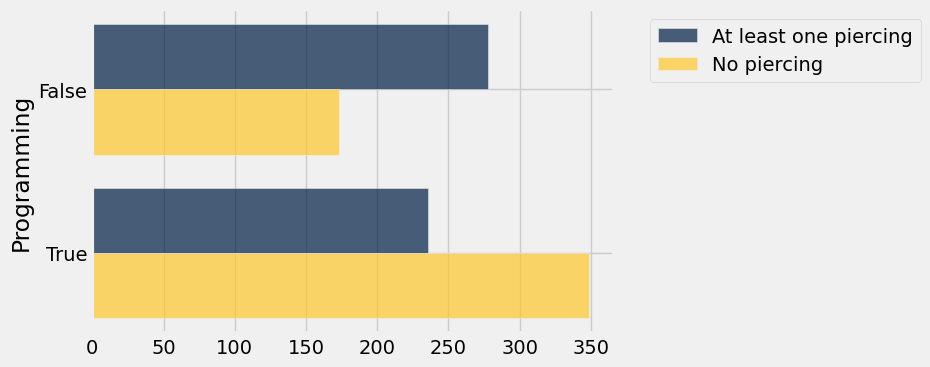

In [111]:
pp_pivot = welcome_survey.pivot('Piercing?',
                     'Programming')

Table().with_columns('Programming', pp_pivot.column(0),
                     'At least one piercing', pp_pivot.column(2),
                     'No piercing', pp_pivot.column(1)).barh(0)

## **Task 3** (1D Random Walk):

Prof Jeremy stands at a starting point for his walk of 100 steps. For each "step": he is equally likely to step one unit to the left, to step one unit to the right, or to stay put. Approximate, through simulation, the probability that after these 100 steps, he is more than five points to the right of his starting point.


Prof Jeremy stands at a starting point for his walk of **100 steps**. For **each "step": he is equally likely to step one unit to the left, to step one unit to the right, or to stay put**. Approximate, through simulation, the probability that after these 100 steps, he is **more than five points to the right** of his starting point.

1. What is the distribution of possible outcomes per "step" (in units traveled), and the probability of each of these occuring?
2. Can we simulate one step based off of this information?
3. Can we simulate many steps and compute the distance traveled? [2 min]
4. Can we simulate many, many walks and then save the distance traveled in each walk? 

In [9]:
def one_step():
    return np.random.choice(make_array(-1,0,1))

In [10]:
def walk():
    steps = make_array()
    for i in np.arange(100):
        steps = np.append(steps, one_step())

    return sum(steps)

In [11]:
walks = make_array()
num_walks = 1000

for i in np.arange(num_walks):
    walks = np.append(walks, walk())

In [23]:
np.array([1,True,5]) + np.array([2,4,6.8])

array([  3. ,   5. ,  11.8])

0.27000000000000002